# One-dimensional random walk, Self-affinity, Hurst exponent

<span style='background-color:yellow;color:red;font-weight:bold'>+ rnd walk: sum of +/- 1</span>

<span style='background-color:yellow;color:red;font-weight:bold'>+ self-sim</span>

<span style='background-color:yellow;color:red;font-weight:bold'>+ self-aff</span>

<span style='background-color:yellow;color:red;font-weight:bold'>+ Hurst</span>

# Wiener process

1. Consider the coin flipping process with $\,n\,$ steps
2. Rescale time by $\,n^{\,-1}\,$
3. Rescale the cumulated sum of $\,+1\,$ and $\,-1\,$ vaules by $\,n^{\,-1\,\mathit{/}\,2}\,$
4. Take the $\,n\to\infty\,$ limit

<span style='background-color:yellow;color:red;font-weight:bold'>+ Next section Description: Drift and expected distance</span>

<span style='background-color:yellow;color:red;font-weight:bold'>+ function: allow drift, line and +/- sqrt guides; do not use them in the first plot, apply them on the 2nd plot</span>

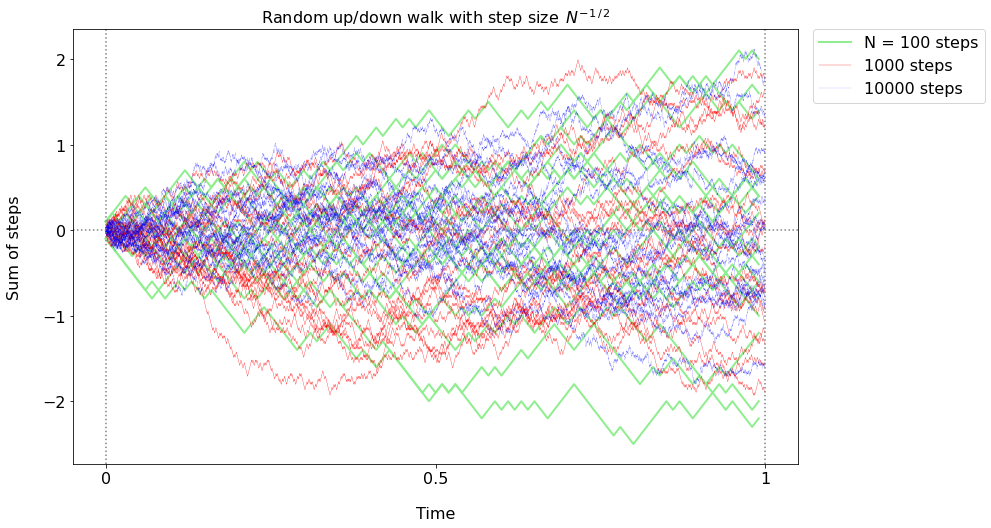

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from numbers import Number

N_STEP_LIST = 100, 1000, 10000
COLOR_LIST = 'lightgreen', 'red', 'blue'
LINE_WIDTH_LIST = 2.0, 0.3, 0.1
N_REALIZATIONS = 20


def plot_wiener_approx(n_step_list=None, color_list=None, line_width_list=None, n_realizations=None):
    """
    Plot discrete approximations of the Wiener process
    """

    # --- checking and setting values ---
    assert isinstance(n_step_list, (list, tuple)), 'n_step_list has to be a list or tuple'
    assert isinstance(n_step_list[0], Number), 'n_step_list must contain numbers'
    assert isinstance(color_list, (list, tuple)), 'color_list has to be a list or tuple'
    assert isinstance(n_realizations, int), 'n_realizations must be an integer'
    assert isinstance(line_width_list, (list, tuple)), 'line_width_list has to be a list or tuple'
    
    my_fontsize = 16
    figure_size = (13, 8)
    labelpad = 20
    xtic_positions = 0, 0.5, 1
    
    # --- plotting ---
    plt.figure(figsize=figure_size)
    for step_index, (color, n_steps, line_width) in enumerate(zip(color_list, n_step_list, line_width_list)):
        for i_realization in range(n_realizations):
            random_steps = [1.0 if i == 1 else -1.0 for i in np.random.randint(0, high=2, size=n_steps)]
            rescaled_cumulated_random_steps = [x / np.sqrt(n_steps) for x in np.cumsum(random_steps)]
            plt.plot(np.linspace(0, 1.0, n_steps, endpoint=False), rescaled_cumulated_random_steps, linestyle='-',
                     label=(('N = ' if step_index == 0 else '') + '{} steps'.format(n_steps) 
                            if 0 == i_realization else None), color=color, lw=line_width)

    plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0., fontsize=my_fontsize)

    plt.title('Random up/down walk with step size ' + r'$\,N^{-1\,\mathit{/}\,2}$', fontsize=my_fontsize)
    plt.xlabel('Time', fontsize=my_fontsize, labelpad=labelpad)
    plt.ylabel('Sum of steps', fontsize=my_fontsize, labelpad=labelpad)
    plt.tick_params(labelsize=my_fontsize)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axvline(0, c='gray', ls='dotted')
    plt.axvline(1, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks(xtic_positions)
    ax.set_xticklabels([str(_) for _ in xtic_positions], fontsize=my_fontsize) 

    plt.show()


plot_wiener_approx(n_step_list=N_STEP_LIST, color_list=COLOR_LIST, line_width_list= LINE_WIDTH_LIST, 
                   n_realizations=N_REALIZATIONS)

# Monte-Carlo pricing with the risk-free metric

## Vanilla assets
1. Based on mainly observations select a microscopic process that generates a path.<br/>
For example, in the simplest case the microscopic process is a normalized random walk with a constant drift.
2. Generate $\,N\,$ paths with this microscopic process.
2. For each of the $\,N\,$ paths, calculate value of the investigated asset at the path's end point.
3. Take the average of end point values. In other words, take each end point value with a weight of $\,\,N^{-1}\,$.
4. Discount this average to $\,t=0\,$ to obtain the PV.

## Exotic assets

5. For exotic derivatives:
   a. some paths may end before they reach the end point
   b. depending on the path, decisions can be triggered that change the path

#  Excess kurtosis, Non-normal tails

# Ito calculus

# Black-Scholes equation

# Black-Scholes for derivative pricing

# Put-call parity check

# Implied volatility

# Volatility cube

# Comparison to Binomial Tree results

# Exercises